# Introduction to Data Science 
# Lecture 4: Introduction to Descriptive Statistics
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecutre, we'll cover 
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)

## Variable types
- **discrete variables**: values are discrete (e.g., year born, T/F)
- **continuous variables**: values are real numbers (e.g., length)

## Levels of measurement
- **Categorical**: Unordered variables 
- **Ordinal**: There is an ordering but no implication of equal distance between the different points of the scale. 
- **Interval**: There are equal differences between successive points on the scale but the position of zero is arbitrary. 
- **Ratio**: The relative magnitudes of scores and the differences between them matter. The position of zero is fixed. 

## Categorical variables
Unordered variables 

Examples: 
- Survey responses: sex (M/F), true or false (T/F), yes or no (Y/N) 
- size: S/M/L/XL 
- color: red, blue, green, etc.


## Ordinal Variables
There is an ordering but no implication of equal distance between the different points of the scale. 


Examples:
- educational level (high school, some college, degree, graduate…) 
- on Likert scale of 1 to 5, how satisfied are you with your instructor? 
- social class (lower, middle, upper) 

<img src="OrdinalVariables.png"/>


## Interval Variables 
There are equal differences between successive points on the scale but the position of zero is arbitrary.

Examples:
- Measurement of temperature using the Celsius or Fahrenheit scales.
- Longitude 

<img src="Thermometer_CF.png" alt="https://en.wikipedia.org/wiki/Fahrenheit#/media/File:Thermometer_CF.svg"/>


## Ratio Variables
The relative magnitudes of scores and the differences between them matter. The position of zero is fixed.

Examples:
- Absolute measure of temperature (Kelvin scale) 
- Age
- Weight
- Length

<img src="Ruler.png" width="50%"  alt="https://commons.wikimedia.org/wiki/File:Metre_pliant_500px.png"/>


## Quiz!

For each of the following variables, what is the variable type (discrete vs. continuous) and level of measurement (categorical, ordinal, interval, or ratio)?
1. Lattitude
2. Olympic 50 meter race times
3. Olympic floor gymnastics score
4. College major
6. Amazon rating for a product

Can you think of another example of an interval variable? 



<img src="purity.png" width="90%"  alt="https://xkcd.com/435/"/>


## Descriptive Statistics

The goal is to describe a dataset with a small number of statistics or figures  

Suppose we are given a sample, $x_1, x_2, \ldots, x_n$ of real values 

Some *descriptive statitsics* for this data are the min, max, median, and mean, $\frac{1}{n} \sum_{i=1}^n x_i$

How do we compute these using python? 


In [1]:
# First import python packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Alta monthly average snowfall, October - April
compiled using data from 1980 to 2014 <br>
https://www.alta.com/conditions/weather-observations/snowfall-history

In [2]:
Alta_avg_month_snow = [28.50,76.77,92.00,95.40,90.85,99.66,80.00]

# this is a list of floats
print(type(Alta_avg_month_snow))
print(type(Alta_avg_month_snow[0]))

<class 'list'>
<class 'float'>


In [3]:
# how many months data do we have?
len(Alta_avg_month_snow)

7

In [4]:
# compute the min and max
np.min(Alta_avg_month_snow),np.max(Alta_avg_month_snow)

(28.5, 99.659999999999997)

In [5]:
# what month do these correspond to? 
imin = np.argmin(Alta_avg_month_snow)
imax = np.argmax(Alta_avg_month_snow)
months = ['Oct','Nov','Dec','Jan','Feb','March','Apr']
months[imin], months[imax]

('Oct', 'March')

In [6]:
# compute the mean
np.mean(Alta_avg_month_snow)

80.454285714285703

In [7]:
# compute the median
np.median(Alta_avg_month_snow)

90.849999999999994

## Data from the 1994 census

import data from the following dataset <br>
https://archive.ics.uci.edu/ml/datasets/Adult

In [8]:
# use pandas to import a table of data from a website
data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=",", 
                  names=("age", "type_employer", "fnlwgt", "education", "education_num", "marital", 
                         "occupation", "relationship", "race","sex","capital_gain", "capital_loss", 
                         "hr_per_week","country", "income"))
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
# export a list containing ages of people in 1994 Census
ages = data["age"].tolist()

In [10]:
print(len(ages))
print(np.min(ages))
print(np.max(ages))
print(np.mean(ages))
print(np.median(ages))

32561
17
90
38.5816467553
37.0


# Histograms

We might also want to make plots that describe a dataset <br>
After all, a picture is worth a thousand words

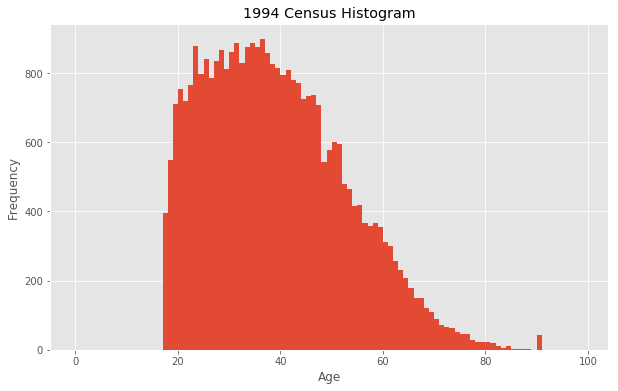

In [11]:
p = plt.hist(ages,np.arange(0,100))
plt.title("1994 Census Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Quantiles 
Quantiles describe what percentage of the observations in a sample have smaller value


In [12]:
np.percentile(ages,25), np.percentile(ages,75)

(28.0, 48.0)

For this data, 25% of the people are under 28 years old

The middle 50% of the data (the data between the 25% and 75% quantiles) is between 28 and 48 years old 

**Question**: how do I read off quantiles from a histogram? 

# Variance and Standard Deviation

Variance and standard deviation quantify the amount of variation or dispersion of a set of data values.

Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>
Variance $= \sigma^2   = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2$ <br>
Std. dev. $= \sigma$


In [13]:
print(np.var(ages))
print(np.std(ages))

186.055686008
13.6402230923


In terms of the histogram,...
<img src="SmallLargeStandDev.png" width="50%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">



## Covariance and Correlation
Covariance and correlation measure of how much two variables change together.

$cov(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)$ 

$\mu_x$ is mean of $x_1,x_2,\ldots,x_n$ <br>
$\mu_y$ is mean of $y_1,y_2,\ldots,y_n$

$corr(x,y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}$

$\sigma_x$ is std. dev. of $x_1,x_2,\ldots,x_n$ <br>
$\sigma_y$ is std. dev. of $y_1,y_2,\ldots,y_n$

Correlations for various pairs of variables:
<img src="Correlation_examples2.svg" width="90%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">





In 1994 consensus data, let's find the correlation between age and hr_per_week

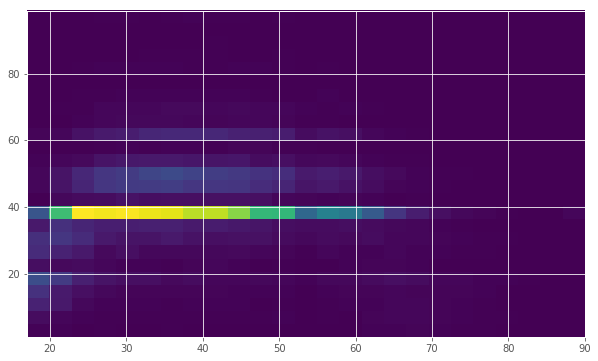

In [14]:
hr = data["hr_per_week"].tolist()
h, x, y, p = plt.hist2d(ages,hr,bins=25);

In [15]:
np.corrcoef(ages,hr)

array([[ 1.        ,  0.06875571],
       [ 0.06875571,  1.        ]])

## Correlation vs Causation

<img src="correlation.png" width="100%"  alt="https://xkcd.com/552/">




## Spurious Correlations I (www.tylervigen.com)

<img src="Conf1.png" width="100%"  alt="www.tylervigen.com">



## Spurious Correlations II (www.tylervigen.com)

<img src="Conf2.png" width="100%" alt="www.tylervigen.com">


## Confounding: example

Suppose we are given city statistics covering a four-month summer period, and observe that swimming pool deaths tend to increase on days when more ice cream is sold. 

Should we conclude that ice cream is the killer? 

## Confounding: example cont.

No! 

As astute analysts, we identify average daily temperature as a confounding variable: on hotter days, people are more likely to both buy ice cream and visit swimming pools. 

Regression methods can be used to statistically control for this confounding variable, eliminating the direct relationship between ice cream sales and swimming pool deaths.

<br> <br> <br> <br> 
source: doi:10.1371/journal.pone.0152719 


## Descriptive vs. Inferential Statistics 

Descriptive statistics quantitatively describe or summarize features of a dataset. 

Inferential statistics attempts to learn about the population from which the data was sampled. 

**Example**: The week before a US presidential election, it is not possible to ask every voting person who they intend to vote for. Instead, a relatively small number of individuals are surveyed. The *hope* is that we can determine the population's preferred candidate from the surveyed results. 

Often, we will model the population as a *probability distribution*. 

*Inferential statistics* is deducing properties of an underlying probability distribution from sampled data. 


## Bernoulli Distribution

The Bernoulli distribution, named after Jacob Bernoulli, is the probability distribution of a random variable which takes the value 1 (success) with probability $p$ and the value 0 (failure) with probability $q=1-p$. 

The Bernoulli distribution with $p=0.5$ (implying $q=0.5$) describes a 'fair' coin toss where 1 and 0  represent "heads" and "tails", respectively. If the coin is unfair, then we would have that $p\neq 0.5$.

We can use python to sample from the Bernoulli probability distribution. 

In [16]:
import scipy as sc
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm

In [17]:
n = 1000;
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(coin_flips)

[0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 

How many heads did we get? We just count the number of 1's. 

In [18]:
print(sum(coin_flips))
print(sum(coin_flips)/n)

471
0.471


What if we flip the coin more times? 

In [19]:
n = 1000000
coin_flips = bernoulli.rvs(p=0.5, size=n)
print(sum(coin_flips)/n)

0.499806


Some facts about Bernoulli variables: 
* mean is p
* variance is p(1-p)

## Binomial distribution

The binomial distribution, with parameters $n$ and $p$, is a discrete probability distribution ``summarizing'' the outcome of $n$ Bernoulli random variables. For simplicity, take $p=0.5$ so that the Bernoulli distribution describes the outcome of a coin. For each flip, the probability of heads is $p$ (so the probability of tails is $q=1-p$). But we don't keep track of the individual flips. We only keep track of how many heads/tails there were in total. So, the binomial distribution can be thought of as summarizing a bunch of (independent) Bernoulli random variables. 

The following code is equivalent to flipping a fair (p=0.5) coin n=10 times and counting the number of heads and then repeating this process 1,000,000 times. 

In [20]:
p = 0.5
n = 10
bin_vars = binom.rvs(n=n,p=p,size=1000000)
print(bin_vars[:100])

[ 2  6  5  4  3  6  6  7  3  4  5  6  4  4  4  7  8  5  7  7  5  8  3  5  4
  5  3  4  7  3  3  4  5  4  4  5  5  5  4  5  4  3  3  6  6  2  4  6  4  6
  6  7  7  7  7  5  4  4  3  3  4  5  5  4  2  6  3  6  5  3  5  5  3  4  8
 10  4  7  4  6  4  5  6  3  3  5  8  5  6  3  4  6  6  6  3  6  6  5  8  5]


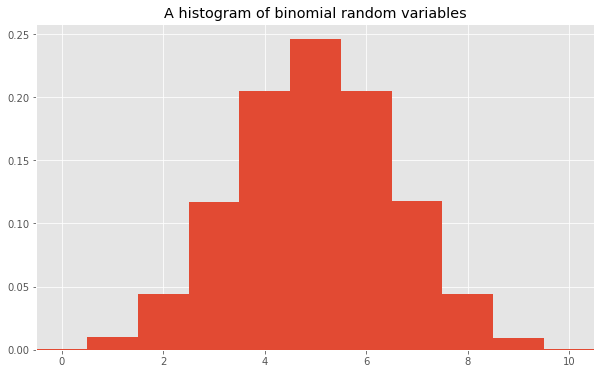

In [21]:
bins=sc.arange(12)-.5
plt.hist(bin_vars, bins=bins,normed=True)
plt.title("A histogram of binomial random variables")
plt.xlim([-.5,10.5])
plt.show()

Some facts about the binomial distribution: 
* The mean is $np$
* The variance is $np(1-p)$

## Discrete random variables and probability mass functions 

The Binomial and Bernoulli random variables are examples of *discrete random variables* since they can take only discrete values. A Bernoulli random variable can take values $0$ or $1$. A binomial random variable  can only take values 
$$
0,1,\ldots, n. 
$$
One can compute the probability that the variable takes each value. This is called the *probability mass function*. 
For a Bernoulli random variable, the probability mass function is given by 
$$
f(k) = \begin{cases} p & k=1 \\ 1-p & k = 0 \end{cases}
$$
For a binomial random variable, the probability mass function is given by 
$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}.
$$
Here, $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to arrange the
$k$ heads among the $n$ flips. For a fair coin, we have $p=0.5$ and $f(k) = \binom{n}{k} \frac{1}{2^n}$. This is the number of ways to arrange $k$ heads among $n$ outcomes divided by the total number of outcomes. 

The probability mass function can be plotted using the scipy library as follows.

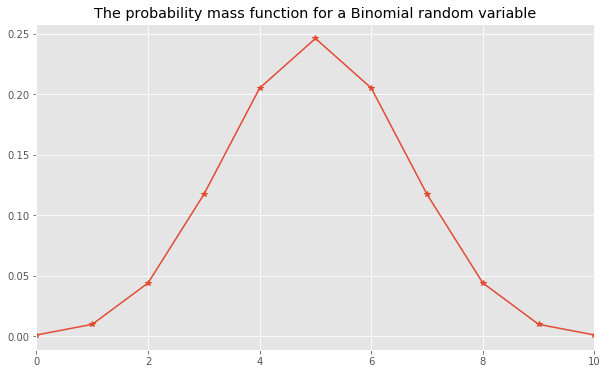

In [22]:
f = lambda k: binom.pmf(k, n=n,p=p)

x = sc.arange(n+1);
plt.plot(x, f(x),'*-')
plt.title("The probability mass function for a Binomial random variable")
plt.xlim([0,n])
plt.show()

Observe that the probability mass function looks very much like the histogram plot! (not a coincidence) 


## Concept check

**Question**: what is a discrete random variable? 

A *discrete random variable (r.v.)* is an abstraction of a coin. It can take on a *discrete* set of possible different values, each with a preassigned probability. We saw two examples of discrete random variables: Bernoulli and binomial.  A Bernoulli r.v. takes value $1$ with probability $p$ and $0$ with probability $1-p$. A binomial r.v. takes values $0,1,\ldots,n$, with a given probability. The probabilities are given by the probability mass function. This function looks just like a histogram if you were to sample a large number of random variables. 

You can use the same descriptive statistics to describe a discrete random value (min, max, mean, variance, etc..).

**Quiz**: what is the random variable that describes a fair dice? the sum of two fair dice? 

## Normal (Gaussian) distribution 

Roughly speaking, normal random variables are described by a "bell curve".  The curve is centered at the mean, $\mu$, and has width given by the standard deviation, $\sigma$. 

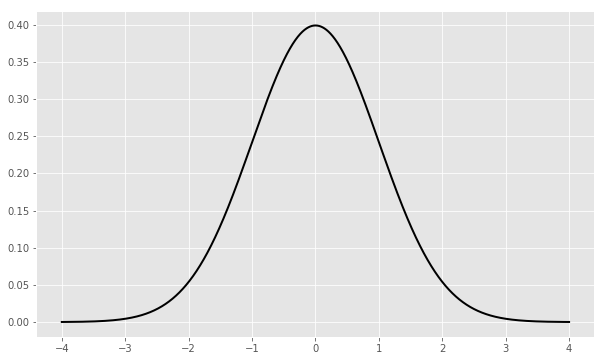

In [23]:
mu = 0 # mean
sigma = 1 # standard deviation 
x = sc.arange(mu-4*sigma,mu+4*sigma,0.001);
pdf = norm.pdf(x,loc=mu, scale=sigma)
# Here, I could have also written
# pdf = 1/(sigma * sc.sqrt(2 * sc.pi)) * sc.exp( - (x - mu)**2 / (2 * sigma**2)) 
plt.plot(x, pdf, linewidth=2, color='k')
plt.show()

## Continuous random variables and probability density functions 

A normal random variable is an example of a *continuous* random variable. A normal random variable can take any real value, but some numbers are more likely than others. More formally, we say that the *probability density function (PDF)* for the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
$$
where $\mu$ is the mean and $\sigma$ is the variance. What this means is that the probability that a normal random variable will take values in the interval $[a,b]$ is given by 
$$
\int_a^b f(x) dx.
$$
This is just the area under the curve for this interval. For $a=\mu-\sigma$ and $b = \mu+\sigma$, we plot this below.

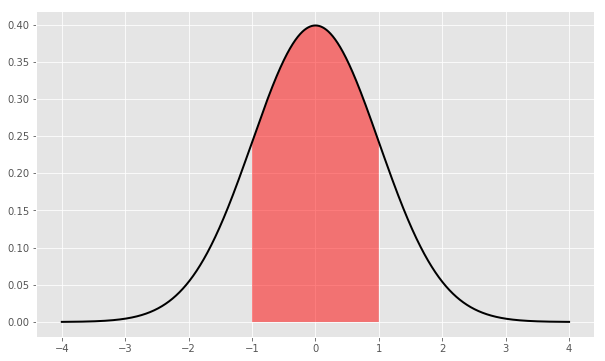

In [24]:
plt.plot(x, pdf, linewidth=2, color='k')
x2 = sc.arange(mu-sigma,mu+sigma,0.001)
plt.fill_between(x2, y1= norm.pdf(x2,loc=mu, scale=sigma), facecolor='red', alpha=0.5)
plt.show()

One can check that 
$$
\int_{-\infty}^\infty f(x) dx = 1
$$
which just means that the probability that the random variable takes value between $-\infty$ and $\infty$ is one. 

This integral can be computed using the *cumulative distribution function* (CDF)
$$
F(x) = \int_{-\infty}^x f(x) dx.
$$
We have that 
$$
\int_a^b f(x) dx = F(b) - F(a)
$$


In [25]:
norm.cdf(mu+sigma, loc=mu, scale=sigma) - norm.cdf(mu-sigma, loc=mu, scale=sigma) 

0.68268949213708585

This means that 68% of the time, this normal random variable will have values between $\mu-\sigma$ and $\mu+\sigma$. 

You used to have to look these values up in a table! 

Let's see what it looks like if we sample 1,000,000 normal random variables and then plot a histogram. 

[-0.56373059  1.28401871  0.71566562  0.19371879 -1.010468    1.14214069
 -0.77828017 -0.81393124  0.27119602  0.65153606 -1.32773209 -0.59331619
 -0.51394363 -1.8359978  -0.70075181  1.28955513 -1.14525761  1.77086846
 -1.48940034  0.73278996  0.77490902  2.37636245 -0.63757256 -0.3133621
 -0.80982611  0.20823166  1.18890799 -0.80947972 -0.64297106 -0.82316664
 -0.01711231 -0.32478154  2.33910211 -0.39532011  0.52370862  1.0392408
  0.67894512 -1.9204782  -0.02000683 -1.72871635  1.27645325 -0.68247802
  0.33230615 -0.18612902  1.56106772  0.9012627  -0.57276432 -1.12497086
 -1.37883369  2.35663936  0.65505283 -0.46200445  2.21963408 -0.3729766
 -0.31379194 -0.04229675 -0.77792923  0.54086679  0.34997199 -0.86689367
  0.74874501 -0.20774809 -1.05673084 -1.39443139  0.14951161  0.42319044
  0.00871989  0.76954592 -0.13009429  1.31159289 -0.61621628  0.1355218
 -0.36433859  0.74999299 -0.54727188  0.08772087  0.29628417  0.38001337
 -0.4342459  -0.37462921  1.12969873 -0.85235533 -1.102

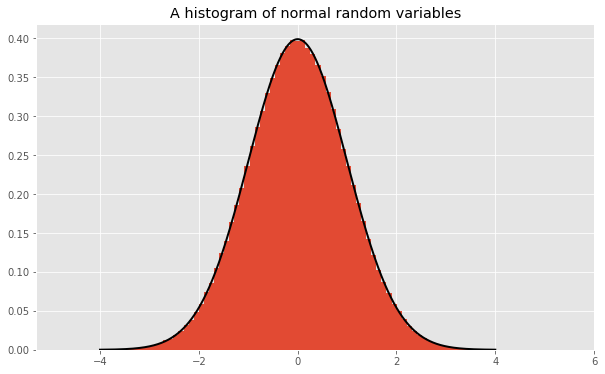

In [26]:
norm_vars = norm.rvs(loc=mu,scale=sigma,size=1000000)
print(norm_vars[:100])

plt.hist(norm_vars, bins=100,normed=True)
plt.plot(x, pdf, linewidth=2, color='k')
plt.title("A histogram of normal random variables")
plt.show()

The histogram of the sampled variables looks just like the probability distribution function!

# Concept recap
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- descriptive vs. inferential statistics
- discrete and continuous random variables (e.g.: Bernouilli, Binomial, Normal)


## Looking ahead:  Hypothesis testing